# Examination of Poverty Dynamics through Data Visualization

In [69]:
import json
import pprint

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Reading the required datasets:

In [3]:
dist_data = pd.read_csv(r'datasets/pca-total.csv')
dist_data_columns = pd.read_csv(r'datasets/pca-colnames.csv')
literacy = pd.read_csv(r'datasets/Literacy Data 2011.csv')
crimes = pd.read_csv(r'datasets/01_District_wise_crimes_committed_IPC_2001_2012.csv')
dist_data_other = pd.read_csv(r'datasets/india-districts-census-2011.csv')

## Preprocessing the data:

Merging the datasets into one dataset.

In [4]:
dist_data.head(50)

,State,District,Level,Name,TRU,TRU1,No_HH,TOT_P,TOT_M,TOT_F,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
0,1,1,DISTRICT,Kupwara,Total,2379.0,113929,870354,474190,396164,...,1955,1216,597,619,7369,4727,2642,641290,283291,357999
1,1,2,DISTRICT,Badgam,Total,1361.0,103363,753745,398041,355704,...,2035,3823,1148,2675,4674,2393,2281,538879,235463,303416
2,1,3,DISTRICT,Leh(Ladakh),Total,45110.0,21909,133487,78971,54516,...,106,65,17,48,633,416,217,58408,25706,32702
3,1,4,DISTRICT,Kargil,Total,14036.0,18338,140802,77785,63017,...,521,263,93,170,3887,2920,967,88929,37946,50983
4,1,5,DISTRICT,Punch,Total,1674.0,90261,476835,251899,224936,...,2035,948,243,705,6374,2762,3612,315442,134222,181220
5,1,6,DISTRICT,Rajouri,Total,2630.0,130401,642415,345351,297064,...,2424,861,217,644,15078,4583,10495,351503,160599,190904
6,1,7,DISTRICT,Kathua,Total,2502.0,119583,616435,326109,290326,...,887,325,161,164,4444,3410,1034,416004,164561,251443
7,1,8,DISTRICT,Baramula,Total,4243.0,152635,1008039,534733,473306,...,3141,1701,787,914,6955,4606,2349,703839,285152,418687
8,1,9,DISTRICT,Bandipore,Total,345.0,58392,392232,207680,184552,...,3773,2472,664,1808,5579,2160,3419,242915,106300,136615
9,1,10,DISTRICT,Srinagar,Total,1979.0,191678,1236829,651124,585705,...,274,2070,305,1765,5706,3711,1995,829641,317973,511668


In [5]:
dist_data_other

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,PONDICHERRY,Mahe,41816,19143,22673,36470,16610,19860,144,...,2316,4309,1370,838,2208,576,978,1554,1446,10027
636,637,PONDICHERRY,Karaikal,200222,97809,102413,154916,79903,75013,35348,...,1063,2408,665,340,1005,246,483,729,341,4890
637,638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842,20727,16115,25332,15397,9935,0,...,685,1895,212,134,346,70,120,190,84,3151
638,639,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597,54861,50736,78683,43186,35497,0,...,685,1895,212,134,346,70,120,190,84,3151


In [6]:
dist_data_cleaned = dist_data[['State','District','Name','TRU1','No_HH','TOT_P','TOT_M','TOT_F','P_LIT','M_LIT','P_ILL','M_ILL','F_ILL','TOT_WORK_P','TOT_WORK_M','TOT_WORK_F','NON_WORK_P','NON_WORK_M','NON_WORK_F']]

dist_data_other_cleaned = dist_data_other[['State name','District code','District name','ST','SC','Hindus','Muslims','Sikhs','Buddhists','Jains','Others_Religions','Religion_Not_Stated','Households','Rural_Households','Urban_Households','Households_with_Internet']]

df = pd.merge(dist_data_cleaned,dist_data_other_cleaned,left_on='District',right_on='District code',how='inner').drop(['District code','District name', 'State', 'District'],axis=1)

In [7]:
df.insert(0, 'State name', df.pop('State name'))

In [8]:
col = df.columns.tolist()

col = ['State', 'District',
 'Area (sq km)',
 'Households',
 'Total Population',
 'Total Males',
 'Total Females',
 'Literate Population',
 'Literate Males',
 'Illiterate Population',
 'Males Illiterates',
 'Female Illiterates',
 'Total Working Population',
 'Total Working Males',
 'Total Working Females',
 'Unemployed Population',
 'Unemployed Males',
 'Unemployed Females',
 'ST',
 'SC',
 'Hindus',
 'Muslims',
 'Sikhs',
 'Buddhists',
 'Jains',
 'Others_Religions',
 'Religion_Not_Stated',
 'Households',
 'Rural_Households',
 'Urban_Households',
 'Households_with_Internet']

df.columns = col

In [9]:
df = df.reset_index(drop=True).set_index('District')
df

,State,Area (sq km),Households,Total Population,Total Males,Total Females,Literate Population,Literate Males,Illiterate Population,Males Illiterates,...,Muslims,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,Households,Rural_Households,Urban_Households,Households_with_Internet
District,,,,,,,,,,,,,,,,,,,,,
Kupwara,JAMMU AND KASHMIR,2379.0,113929,870354,474190,396164,439654,282823,430700,191367,...,823286,5600,66,39,13,2522,181664,158438,23226,762
Badgam,JAMMU AND KASHMIR,1361.0,103363,753745,398041,355704,335649,207741,418096,190300,...,736054,5559,47,6,2,478,187839,160649,27190,1999
Leh(Ladakh),JAMMU AND KASHMIR,45110.0,21909,133487,78971,54516,93770,62834,39717,16137,...,19057,1092,88635,103,54,1006,54394,36920,17474,574
Kargil,JAMMU AND KASHMIR,14036.0,18338,140802,77785,63017,86236,56301,54566,21484,...,108239,1171,20126,28,4,289,48144,40370,7774,235
Punch,JAMMU AND KASHMIR,1674.0,90261,476835,251899,224936,261724,163333,215111,88566,...,431279,11188,83,10,2,711,147408,132139,15269,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mahe,PONDICHERRY,9.0,7420,41816,19143,22673,36470,16610,5346,2533,...,12856,3,21,14,3,21,12110,0,12110,574
Karaikal,PONDICHERRY,157.0,49705,200222,97809,102413,154916,79903,45306,17906,...,28835,46,63,54,14,181,69333,35618,33715,1868
Nicobars,ANDAMAN AND NICOBAR ISLANDS,1841.0,9288,36842,20727,16115,25332,15397,11510,5330,...,1336,343,119,0,248,38,15958,15958,0,57


## Districts with highest HCR (head-count ratio) for persons in poverty are:
 
 - Malkangiri  
 - Nabagangapur
 - Rayagada
 - Koraput
 - Nuapada
 
According to study:
(https://www.researchgate.net/figure/The-100-Districts-in-India-with-the-Highest-Poverty-Rates_tbl2_40771948)

In [10]:
poor_districts = ['Malkangiri', 'Nabarangapur', 'Rayagada', 'Koraput', 'Nuapada']
df_list = []
df_poor = pd.DataFrame()
for district in poor_districts:
  df_list.append(df.query(f'District == "{district}"')) 
  
df_poor = pd.concat(df_list)
df_poor

,State,Area (sq km),Households,Total Population,Total Males,Total Females,Literate Population,Literate Males,Illiterate Population,Males Illiterates,...,Muslims,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,Households,Rural_Households,Urban_Households,Households_with_Internet
District,,,,,,,,,,,,,,,,,,,,,
Malkangiri,ORISSA,5791.0,137599,613192,303624,309568,244706,147001,368486,156623,...,1871,213,43,195,35,577,183723,167884,15839,448
Nabarangapur,ORISSA,5291.0,273423,1220946,604812,616134,470379,286984,750567,317828,...,6753,169,189,325,54,3299,372264,342840,29424,1324
Rayagada,ORISSA,7073.0,226144,967911,471960,495951,407735,241959,560176,230001,...,4607,219,249,123,44,3308,286548,237343,49205,1553
Koraput,ORISSA,8807.0,337677,1379647,678809,700838,568090,340843,811557,337966,...,8850,518,219,491,3384,3484,460128,381789,78339,3988
Nuapada,ORISSA,3852.0,152210,610382,301962,308420,299383,180903,310999,121059,...,4952,724,76,905,22,833,209127,197258,11869,757


In [11]:
df_poor.index.values

array(['Malkangiri', 'Nabarangapur', 'Rayagada', 'Koraput', 'Nuapada'],
      dtype=object)

In [12]:
literacy_rates = []
employment_rates = []
pct_urban_households = []

for district in df_poor.index:
 
 literacy_rates.append(round(float(df_poor.loc[district]['Literate Population'] / df_poor.loc[district]['Total Population']) * 100,2)) 
 employment_rates.append(round(float(df_poor.loc[district]['Unemployed Population'] / df_poor.loc[district]['Total Population'])  * 100,2)) 
 pct_urban_households.append(round(float(df_poor.loc[district]['Urban_Households'] / df_poor.loc[district]['Households'][1])  * 100,2))

df_poor_plot = pd.DataFrame({'District': df_poor.index.values, 'Literacy Rates': literacy_rates, 'Employment Rates': employment_rates, "Percentage of Urban Households": pct_urban_households})
df_poor_plot

/tmp/ipykernel_26068/2849139382.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pct_urban_households.append(round(float(df_poor.loc[district]['Urban_Households'] / df_poor.loc[district]['Households'][1])  * 100,2))


,District,Literacy Rates,Employment Rates,Percentage of Urban Households
0,Malkangiri,39.91,49.34,8.62
1,Nabarangapur,38.53,49.96,7.90
2,Rayagada,42.13,51.74,17.17
3,Koraput,41.18,49.74,17.03
4,Nuapada,49.05,49.96,5.68


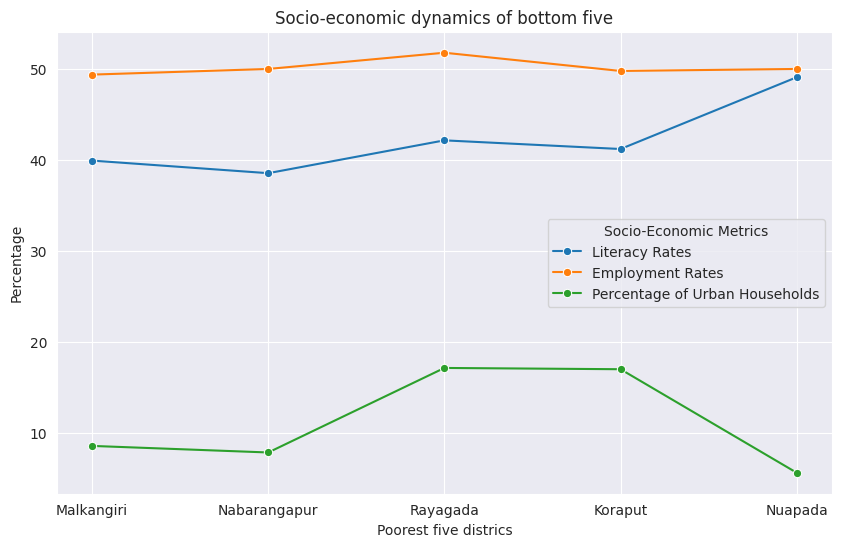

In [13]:
df_poor_melted = pd.melt(df_poor_plot, id_vars=['District'], var_name='Metric', value_name='Percentage')
plt.figure(figsize=(10, 6))
sns.lineplot(x='District', y='Percentage', hue='Metric', marker='o', data=df_poor_melted)

plt.title('Socio-economic dynamics of bottom five')
plt.xlabel('Poorest five districs')
plt.ylabel('Percentage')
plt.legend(title='Socio-Economic Metrics')
plt.grid(True)
plt.show()

## Parsing the NITI Aayog Multidimensional Poverty Index Report

The data is found in the 2011 NITI Aayog NFHS survey, in a tabulated manner for each district. We must obtain the Head-Count Ratio for each district.

HCR: Percentage of population below the poverty line.

In [14]:
!pip install pdfplumber pdfminer.six

In [2]:
import pdfplumber

def extract_text_from_pdfplumber(pdf_path, page_num):
    
    with pdfplumber.open(pdf_path) as pdf:
        
        page = pdf.pages[page_num]
        text = page.extract_text()

    return text


In [1]:
pdf_path = 'resources/India-National-Multidimentional-Poverty-Index-2023.pdf'
list_of_pages = [83, 91, 99, 107, 115, 121, 129, 137, 145, 153, 161, 169, 185, 193, 201, 209, 217, 225, 233, 241, 248, 255, 262, 268, 276, 283, 291, 297, 303, 309, 316, 323, 329, 335, 342]

In [18]:
start = 80
end = 350

list_of_pages = []

for i in range(start,end):
    extracted_text = extract_text_from_pdfplumber(pdf_path, i)
    if extracted_text.__contains__('Overview of Districts'):
        list_of_pages.append(i)
        
print(list_of_pages)

[83, 91, 99, 107, 115, 121, 129, 137, 145, 153, 161, 169, 185, 193, 201, 209, 217, 225, 233, 241, 248, 255, 262, 268, 276, 283, 291, 297, 303, 309, 316, 323, 329, 335, 342]


In [19]:
text = "\nTHIS IS THE END OF ONE PAGE\n"

with pdfplumber.open(pdf_path) as pdf:
    for page in list_of_pages:
    
        page = pdf.pages[page]
        
        text = text + page.extract_text()
        text = text + "\nTHIS IS THE END OF ONE PAGE\n"
print(os.getcwd())
with open('resources/rawtext.txt', 'w') as file:
    file.write(text)

/home/tam0w/PycharmProjects/poverty_data


In [34]:
indian_states = [
    'Andhra Pradesh',
    'Arunachal Pradesh',
    'Assam',
    'Bihar',
    'Chhattisgarh',
    'Goa',
    'Gujarat',
    'Haryana',
    'Himachal Pradesh',
    'Jharkhand',
    'Karnataka',
    'Kerala',
    'Madhya Pradesh',
    'Maharashtra',
    'Manipur',
    'Meghalaya',
    'Mizoram',
    'Nagaland',
    'Odisha',
    'Punjab',
    'Rajasthan',
    'Sikkim',
    'Tamil Nadu',
    'Telangana',
    'Tripura',
    'Uttar Pradesh',
    'Uttarakhand',
    'West Bengal'
]

union_territories = [
    'Andaman and Nicobar Islands',
    'Chandigarh',
    'Dadra and Nagar Haveli and Daman and Diu',
    'Lakshadweep',
    'Delhi',
    'Puducherry'
]

# Combine the lists
india_regions = indian_states + union_territories

In [105]:
import json

specified_part = "THIS IS THE END OF ONE PAGE"
all_pages = {}
page_info = {}
regions = []
with open('resources/rawtext.txt', 'r') as file:
    for i,page in enumerate(list_of_pages):
        page_data = []
        for line in file:
            page_data.append(line)
            for region in india_regions:
                    if region in line:
                        region_key = region
            if specified_part in line:
                all_pages[f'page{list_of_pages[i]}'] = page_data
                if "Headcount Ratio Intensity MPI Headcount Ratio Intensity MPI\n" in page_data:
                    print(region_key)
                    print('its there')
                    index = page_data.index("Headcount Ratio Intensity MPI Headcount Ratio Intensity MPI\n")
                    try:
                        page_info[region_key] = page_data[index+1:]
                    except:
                        page_info[f'page{list_of_pages[i]}'] = page_data
                break

# pprint.pprint(all_pages)
# print(json.dumps(all_pages))

Andhra Pradesh
its there
Arunachal Pradesh
its there
Goa
its there
Chhattisgarh
its there
Goa
its there
Gujarat
its there
Haryana
its there
Himachal Pradesh
its there
Jharkhand
its there
Karnataka
its there
Kerala
its there
Maharashtra
its there
Meghalaya
its there
Mizoram
its there
Nagaland
its there
Odisha
its there
Punjab
its there
Rajasthan
its there
Sikkim
its there
Tamil Nadu
its there
Telangana
its there
Tripura
its there
Uttar Pradesh
its there
Uttarakhand
its there
Bihar
its there
Bihar
its there
Chandigarh
its there
Chandigarh
its there
Delhi
its there
Delhi
its there
Delhi
its there
Lakshadweep
its there


In [99]:
print(json.dumps(page_info))

{"Andhra Pradesh": ["Anantapur 12.47% 42.00% 0.052 6.74% 40.56% 0.027\n", "Chittoor 9.64% 42.65% 0.041 5.66% 39.20% 0.022\n", "East Godavari 8.51% 41.34% 0.035 6.13% 43.65% 0.027\n", "Guntur 7.26% 41.12% 0.030 4.36% 37.58% 0.016\n", "Krishna 8.69% 41.56% 0.036 4.38% 38.22% 0.017\n", "Kurnool 19.64% 45.87% 0.090 12.84% 42.32% 0.054\n", "Prakasam 13.84% 45.44% 0.063 6.28% 43.60% 0.027\n", "SPSR Nellore 11.27% 43.79% 0.049 5.41% 43.06% 0.023\n", "Srikakulam 14.01% 41.56% 0.058 5.20% 41.83% 0.022\n", "Visakhapatanam 15.10% 46.99% 0.071 7.60% 40.81% 0.031\n", "Vizianagaram 19.00% 42.42% 0.081 8.66% 40.20% 0.035\n", "West Godavari 9.11% 39.79% 0.036 2.42% 42.56% 0.010\n", "Y.S.R. (Kadapa) 9.14% 41.83% 0.038 3.34% 38.51% 0.013\n", "56\n", "THIS IS THE END OF ONE PAGE\n"], "Arunachal Pradesh": ["Anjaw 22.86% 42.92% 0.098 13.09% 43.24% 0.057\n", "Changlang 26.47% 48.08% 0.127 14.39% 43.49% 0.063\n", "Dibang Valley 16.95% 41.31% 0.070 10.11% 42.72% 0.043\n", "East Kameng 44.03% 48.87% 0.215 22.0

In [107]:
print(json.dumps(all_pages))

{"page83": ["\n", "THIS IS THE END OF ONE PAGE\n"], "page91": ["ANDHRA PRADESH MPI: PROGRESS REVIEW 2023\n", "Andhra Pradesh: Overview of Districts\n", "Headcount Ratio, Intensity and MPI\n", "NFHS-4 (2015\u201316) NFHS-5 (2019\u201321)\n", "District\n", "Headcount Ratio Intensity MPI Headcount Ratio Intensity MPI\n", "Anantapur 12.47% 42.00% 0.052 6.74% 40.56% 0.027\n", "Chittoor 9.64% 42.65% 0.041 5.66% 39.20% 0.022\n", "East Godavari 8.51% 41.34% 0.035 6.13% 43.65% 0.027\n", "Guntur 7.26% 41.12% 0.030 4.36% 37.58% 0.016\n", "Krishna 8.69% 41.56% 0.036 4.38% 38.22% 0.017\n", "Kurnool 19.64% 45.87% 0.090 12.84% 42.32% 0.054\n", "Prakasam 13.84% 45.44% 0.063 6.28% 43.60% 0.027\n", "SPSR Nellore 11.27% 43.79% 0.049 5.41% 43.06% 0.023\n", "Srikakulam 14.01% 41.56% 0.058 5.20% 41.83% 0.022\n", "Visakhapatanam 15.10% 46.99% 0.071 7.60% 40.81% 0.031\n", "Vizianagaram 19.00% 42.42% 0.081 8.66% 40.20% 0.035\n", "West Godavari 9.11% 39.79% 0.036 2.42% 42.56% 0.010\n", "Y.S.R. (Kadapa) 9.14% 41

In [100]:
pprint.pprint(page_info)

{'Andhra Pradesh': ['Anantapur 12.47% 42.00% 0.052 6.74% 40.56% 0.027\n',
                    'Chittoor 9.64% 42.65% 0.041 5.66% 39.20% 0.022\n',
                    'East Godavari 8.51% 41.34% 0.035 6.13% 43.65% 0.027\n',
                    'Guntur 7.26% 41.12% 0.030 4.36% 37.58% 0.016\n',
                    'Krishna 8.69% 41.56% 0.036 4.38% 38.22% 0.017\n',
                    'Kurnool 19.64% 45.87% 0.090 12.84% 42.32% 0.054\n',
                    'Prakasam 13.84% 45.44% 0.063 6.28% 43.60% 0.027\n',
                    'SPSR Nellore 11.27% 43.79% 0.049 5.41% 43.06% 0.023\n',
                    'Srikakulam 14.01% 41.56% 0.058 5.20% 41.83% 0.022\n',
                    'Visakhapatanam 15.10% 46.99% 0.071 7.60% 40.81% 0.031\n',
                    'Vizianagaram 19.00% 42.42% 0.081 8.66% 40.20% 0.035\n',
                    'West Godavari 9.11% 39.79% 0.036 2.42% 42.56% 0.010\n',
                    'Y.S.R. (Kadapa) 9.14% 41.83% 0.038 3.34% 38.51% 0.013\n',
                    '56\n'

In [81]:
district_info = []
for page in page_info.values():
    for line in page:
        words = line.split(' ')
        name = [word for word in words if word.isalpha() or word.__contains__('(')]
        numbers = [word for word in words if word.__contains__('%') or word.__contains__('-')]
        district_name = " ".join(name)
        try:
            district_info.append([district_name, numbers[0]])
        except:
            district_info.append([district_name, "NA"])
        
        

In [83]:
district_info

[['Anantapur', '12.47%'],
 ['Chittoor', '9.64%'],
 ['East Godavari', '8.51%'],
 ['Guntur', '7.26%'],
 ['Krishna', '8.69%'],
 ['Kurnool', '19.64%'],
 ['Prakasam', '13.84%'],
 ['SPSR Nellore', '11.27%'],
 ['Srikakulam', '14.01%'],
 ['Visakhapatanam', '15.10%'],
 ['Vizianagaram', '19.00%'],
 ['West Godavari', '9.11%'],
 ['(Kadapa)', '9.14%'],
 ['', 'NA'],
 ['THIS IS THE END OF ONE', 'NA'],
 ['Anjaw', '22.86%'],
 ['Changlang', '26.47%'],
 ['Dibang Valley', '16.95%'],
 ['East Kameng', '44.03%'],
 ['East Siang', '8.84%'],
 ['', 'NA'],
 ['Kra Daadi', '18.91%'],
 ['Kurung Kumey', '39.55%'],
 ['Lohit', '31.97%'],
 ['Longding', '20.97%'],
 ['Lower Dibang Valley', '23.56%'],
 ['Lower Subansiri', '15.80%'],
 ['Namsai', '22.11%'],
 ['Papum Pare', '12.85%'],
 ['Siang', '9.15%'],
 ['Tawang', '31.25%'],
 ['Tirap', '28.30%'],
 ['Upper Siang', '15.88%'],
 ['Upper Subansiri', '29.78%'],
 ['West Kameng', '22.44%'],
 ['West Siang', '14.49%'],
 ['', 'NA'],
 ['THIS IS THE END OF ONE', 'NA'],
 ['North Goa', '

In [84]:
poverty_df = pd.DataFrame({'Districts':[row[0] for row in district_info], 'MPI HCR':[row[1] for row in district_info]})

In [86]:
poverty_df = poverty_df.drop_duplicates()

In [95]:
poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 0 to 601
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Districts  536 non-null    object
 1   MPI HCR    536 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [ ]:
    extracted_text